In [ ]:
import json
import pandas as pd

# Caminho do arquivo JSON
file_path = "data/match_details.json"

# Carregar o arquivo JSON corretamente
with open(file_path, "r", encoding="utf-8") as file:
    match_data = json.load(file)

# Processar os dados em um formato estruturado
rows = []
for match in match_data:
    game_id = match["match_id"]
    for player in match["player_stats"]:
        k, d = map(int, player["k_d"].split('-')) 
        rows.append([
            game_id,
            player["team"],
            player["player"],
            k,  
            d, 
            player["plus_minus"],
            player["adr"],
            player["kast"],
            player["rating"],
            match["first_team"],
            match["second_team"],
            match["first_team_total_score"],
            match["second_team_total_score"],
            match["first_team_won"]
        ])

# Criar um DataFrame
df = pd.DataFrame(rows, columns=[
    "game_id", "team", "player", "k", "d", "plus_minus", "adr", "kast", "rating",
    "first_team", "second_team", "first_team_total_score", "second_team_total_score",
    "first_team_won"
])

df['kd'] = df['k'] / df['d']
df['kast'] = df['kast'].str.replace('%','')
numeric_columns = ['first_team_won', "k", "d", "adr", 'plus_minus', "kast", "rating", 'kd']
palette = {0: "red", 1: "blue"}
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
# Exibir o DataFrame para verificação
print(df.tail())

# Salvar em um arquivo Excel
df.to_excel('data/full_dataset.xlsx', index=False)


                    game_id        team                     player   k   d  \
106205  2229314681628953987  EYEBALLERS       Jesper 'JW' Wecksell  49  25   
106206  2229314681628953987  EYEBALLERS       Ludvig 'HEAP' Alonso  38  27   
106207  2229314681628953987  EYEBALLERS      Peppe 'Peppzor' Borak  32  23   
106208  2229314681628953987  EYEBALLERS     Anton 'Sapec' Palmgren  33  32   
106209  2229314681628953987  EYEBALLERS  Casper 'SHiNE' Wennerberg  23  30   

        plus_minus    adr  kast  rating first_team second_team  \
106205          24  104.0  80.4    1.70   ECSTATIC  EYEBALLERS   
106206          11   93.1  91.3    1.40   ECSTATIC  EYEBALLERS   
106207           9   76.1  78.3    1.20   ECSTATIC  EYEBALLERS   
106208           1   80.1  76.1    1.19   ECSTATIC  EYEBALLERS   
106209          -7   44.0  89.1    0.95   ECSTATIC  EYEBALLERS   

        first_team_total_score  second_team_total_score  first_team_won  \
106205                       0                        2    

In [9]:
import pandas as pd


# Criar a tabela de partidas (matches)
matches = df[['game_id', 'first_team', 'second_team', 
              'first_team_total_score', 'second_team_total_score', 'first_team_won']].drop_duplicates()

# Agregar estatísticas por time em cada partida
team_stats = df.groupby(['game_id', 'team']).agg(
    avg_kills=('k', 'mean'),
    avg_deaths=('d', 'mean'),
    avg_kd=('kd', 'mean'),
    total_kills=('k', 'sum'),
    total_adr=('adr', 'sum'),
    avg_rating=('rating', 'mean')
).reset_index()

# Unir os dados agregados com a tabela de partidas
match_modeling = matches.merge(
    team_stats, left_on=['game_id', 'first_team'], right_on=['game_id', 'team'], suffixes=('', '_first')
).merge(
    team_stats, left_on=['game_id', 'second_team'], right_on=['game_id', 'team'], suffixes=('_first', '_second')
).drop(columns=['team_first', 'team_second'])

# Exibir a tabela resultante
print(match_modeling.tail())


                   game_id first_team second_team  first_team_total_score  \
10599 -6924113985868922632   9 Pandas      Preasy                       0   
10600 -4041458044070913098      UNiTY      Sangal                       0   
10601 -2917202566991549282   00NATION       ECLOT                       2   
10602 -5329905099550585871   Wings Up    ManSLand                      13   
10603  2229314681628953987   ECSTATIC  EYEBALLERS                       0   

       second_team_total_score  first_team_won  avg_kills_first  \
10599                        2               0             22.8   
10600                        2               0             30.2   
10601                        1               1             42.0   
10602                       11               1             16.4   
10603                        2               0             27.4   

       avg_deaths_first  avg_kd_first  total_kills_first  total_adr_first  \
10599              31.2      0.729583                114 

Treinando Random Forest Gini...

Random Forest Gini - Acurácia Treino: 0.9999 | Acurácia Teste: 0.9043
Overfitting Gap: 0.0956

Matriz de Confusão:
[[ 805  112]
 [  91 1113]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.8984    0.8779    0.8880       917
           1     0.9086    0.9244    0.9164      1204

    accuracy                         0.9043      2121
   macro avg     0.9035    0.9011    0.9022      2121
weighted avg     0.9042    0.9043    0.9041      2121

--------------------------------------------------
Treinando Random Forest Entropy...

Random Forest Entropy - Acurácia Treino: 0.9999 | Acurácia Teste: 0.9043
Overfitting Gap: 0.0956

Matriz de Confusão:
[[ 805  112]
 [  91 1113]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.8984    0.8779    0.8880       917
           1     0.9086    0.9244    0.9164      1204

    accuracy                         0.9043 

c:\Users\deand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\deand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\deand\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo


Support Vector Machine sigmoid - Acurácia Treino: 0.5586 | Acurácia Teste: 0.5677
Overfitting Gap: -0.0090

Matriz de Confusão:
[[   0  917]
 [   0 1204]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000       917
           1     0.5677    1.0000    0.7242      1204

    accuracy                         0.5677      2121
   macro avg     0.2838    0.5000    0.3621      2121
weighted avg     0.3222    0.5677    0.4111      2121

--------------------------------------------------
Treinando XGBoost...

XGBoost - Acurácia Treino: 0.9321 | Acurácia Teste: 0.9114
Overfitting Gap: 0.0207

Matriz de Confusão:
[[ 814  103]
 [  85 1119]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0     0.9055    0.8877    0.8965       917
           1     0.9157    0.9294    0.9225      1204

    accuracy                         0.9114      2121
   macro avg     0.9106    0.9085    

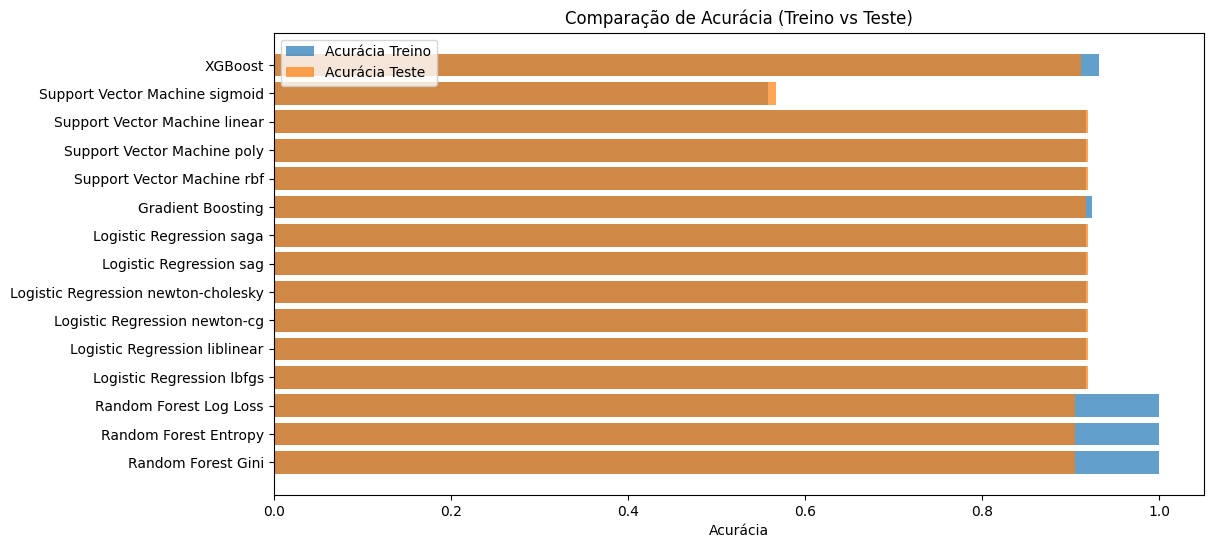

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gmean  # Importação para média geométrica
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

# Criar a tabela de partidas (matches)
matches = df[['game_id', 'first_team', 'second_team', 
              'first_team_total_score', 'second_team_total_score', 'first_team_won']].drop_duplicates()

# Função segura para média geométrica (evita valores zero ou negativos)
def safe_gmean(series):
    series = series[series > 0]  # Remover valores zero ou negativos
    if len(series) == 0:
        return 0  # Se não houver valores positivos, retorna zero
    return gmean(series)

# Agregar estatísticas por time em cada partida usando média geométrica
team_stats = df.groupby(['game_id', 'team']).agg(
    # avg_kd=('kd', safe_gmean),      # MÉDIA GEOMÉTRICA NO KD
    # total_adr=('adr', 'sum'),       # ADR continua com soma (pois é acumulativo)
    avg_rating=('rating', safe_gmean)  # MÉDIA GEOMÉTRICA NO RATING
).reset_index()

# Unir os dados agregados com a tabela de partidas
match_modeling = matches.merge(
    team_stats, left_on=['game_id', 'first_team'], right_on=['game_id', 'team'], suffixes=('', '_first')
).merge(
    team_stats, left_on=['game_id', 'second_team'], right_on=['game_id', 'team'], suffixes=('_first', '_second')
).drop(columns=['team_first', 'team_second'])

# Remover colunas irrelevantes para o modelo
match_modeling.drop(columns=['first_team_total_score', 'second_team_total_score'], inplace=True)

# Separar features e target
features = match_modeling.drop(columns=['game_id', 'first_team', 'second_team', 'first_team_won'])
target = match_modeling['first_team_won']

# Divisão dos dados em treino e teste (85% treino, 15% teste)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Substituir infinitos por NaN temporariamente
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Substituir NaNs pelo maior valor encontrado na coluna (ignorando NaN)
for col in X_train.columns:
    max_val = X_train[col].max()  # Encontra o maior valor finito na coluna
    X_train[col] = X_train[col].fillna(max_val)

for col in X_test.columns:
    max_val = X_test[col].max()  # Encontra o maior valor finito na coluna
    X_test[col] = X_test[col].fillna(max_val)

rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)  # Ajusta a taxa de undersampling
X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)

# Lista de modelos
models = {
    "Random Forest Gini": RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42),
    "Random Forest Entropy": RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=42),
    "Random Forest Log Loss": RandomForestClassifier(criterion='log_loss', n_estimators=100, random_state=42),
    "Logistic Regression lbfgs": LogisticRegression(solver='lbfgs', max_iter=5000, random_state=42),
    "Logistic Regression liblinear": LogisticRegression(solver='liblinear', max_iter=5000, random_state=42),
    "Logistic Regression newton-cg": LogisticRegression(solver='newton-cg', max_iter=5000, random_state=42),
    "Logistic Regression newton-cholesky": LogisticRegression(solver='newton-cholesky', max_iter=5000, random_state=42),
    "Logistic Regression sag": LogisticRegression(solver='sag', max_iter=5000, random_state=42),
    "Logistic Regression saga": LogisticRegression(solver='saga', max_iter=5000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Machine rbf": SVC(kernel='rbf', probability=True, random_state=42),
    "Support Vector Machine poly": SVC(kernel='poly', probability=True, random_state=42),
    "Support Vector Machine linear": SVC(kernel='linear', probability=True, random_state=42),
    "Support Vector Machine sigmoid": SVC(kernel='sigmoid', probability=True, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dicionário para armazenar resultados
results = []

# Treinar e avaliar cada modelo
for name, model in models.items():
    print(f"Treinando {name}...")
    model.fit(X_train, y_train)
    
    # Avaliação no treino
    y_train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_train_pred)
    
    # Avaliação no teste
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)
    
    # Cálculo da diferença (overfitting check)
    overfitting_gap = train_acc - test_acc
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, digits=4)
    
    results.append({
        "Modelo": name,
        "Acurácia Treino": train_acc,
        "Acurácia Teste": test_acc,
        "Diferença Treino-Teste": overfitting_gap
    })
    
    print(f"\n{name} - Acurácia Treino: {train_acc:.4f} | Acurácia Teste: {test_acc:.4f}")
    print(f"Overfitting Gap: {overfitting_gap:.4f}")
    print("\nMatriz de Confusão:")
    print(conf_matrix)
    print("\nRelatório de Classificação:")
    print(class_report)
    print("-" * 50)

# Criar dataframe de resultados
results_df_geom = pd.DataFrame(results)

# 📈 Plotar os resultados para visualização do overfitting
plt.figure(figsize=(12, 6))
plt.barh(results_df_geom["Modelo"], results_df_geom["Acurácia Treino"], label="Acurácia Treino", alpha=0.7)
plt.barh(results_df_geom["Modelo"], results_df_geom["Acurácia Teste"], label="Acurácia Teste", alpha=0.7)
plt.xlabel("Acurácia")
plt.title("Comparação de Acurácia (Treino vs Teste)")
plt.legend(loc='upper left')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import gmean  # Para média geométrica
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler

# Supondo que 'df' já está carregado com os dados históricos
matches = df[['game_id', 'first_team', 'second_team', 
              'first_team_total_score', 'second_team_total_score', 'first_team_won']].drop_duplicates()

# Função segura para média geométrica
def safe_gmean(series):
    series = series[series > 0]  # Considera somente valores positivos
    if len(series) == 0:
        return 0
    return gmean(series)

# Agregar estatísticas por time (utilizando a média geométrica do rating)
team_stats = df.groupby(['game_id', 'team']).agg(
    avg_rating=('rating', safe_gmean)
).reset_index()

# Unir os dados agregados com a tabela de partidas
match_modeling = matches.merge(
    team_stats, left_on=['game_id', 'first_team'], right_on=['game_id', 'team'], suffixes=('', '_first')
).merge(
    team_stats, left_on=['game_id', 'second_team'], right_on=['game_id', 'team'], suffixes=('_first', '_second')
).drop(columns=['team_first', 'team_second'])

# Remover colunas irrelevantes
match_modeling.drop(columns=['first_team_total_score', 'second_team_total_score'], inplace=True)

# Separar features e target
features = match_modeling.drop(columns=['game_id', 'first_team', 'second_team', 'first_team_won'])
target = match_modeling['first_team_won']

# Tratamento de valores infinitos e NaNs
features.replace([np.inf, -np.inf], np.nan, inplace=True)
for col in features.columns:
    if features[col].dtype.kind in 'biufc':  # Verifica se é coluna numérica
        max_val = features[col].max(skipna=True)
        features[col] = features[col].fillna(max_val)

# Balanceamento das classes via undersampling
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
features_res, target_res = rus.fit_resample(features, target)

# Dicionário com os modelos a serem treinados
models = {
    "Random Forest Gini": RandomForestClassifier(criterion='gini', n_estimators=100, random_state=42),
    "Random Forest Entropy": RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=42),
    "Random Forest Log Loss": RandomForestClassifier(criterion='log_loss', n_estimators=100, random_state=42),
    "Logistic Regression lbfgs": LogisticRegression(solver='lbfgs', max_iter=5000, random_state=42),
    "Logistic Regression liblinear": LogisticRegression(solver='liblinear', max_iter=5000, random_state=42),
    "Logistic Regression newton-cg": LogisticRegression(solver='newton-cg', max_iter=5000, random_state=42),
    "Logistic Regression newton-cholesky": LogisticRegression(solver='newton-cholesky', max_iter=5000, random_state=42),
    "Logistic Regression sag": LogisticRegression(solver='sag', max_iter=5000, random_state=42),
    "Logistic Regression saga": LogisticRegression(solver='saga', max_iter=5000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    "Support Vector Machine rbf": SVC(kernel='rbf', probability=True, random_state=42),
    "Support Vector Machine poly": SVC(kernel='poly', probability=True, random_state=42),
    "Support Vector Machine linear": SVC(kernel='linear', probability=True, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Treinamento dos modelos utilizando a base inteira (balanceada)
for name, model in models.items():
    model.fit(features_res, target_res)
    print(f"Modelo {name} treinado.")


Modelo Random Forest Gini treinado.
Modelo Random Forest Entropy treinado.
Modelo Random Forest Log Loss treinado.
Modelo Logistic Regression lbfgs treinado.
Modelo Logistic Regression liblinear treinado.
Modelo Logistic Regression newton-cg treinado.
Modelo Logistic Regression newton-cholesky treinado.
Modelo Logistic Regression sag treinado.
Modelo Logistic Regression saga treinado.
Modelo Gradient Boosting treinado.
Modelo Support Vector Machine rbf treinado.
Modelo Support Vector Machine poly treinado.
Modelo Support Vector Machine linear treinado.
Modelo XGBoost treinado.
Previsões do modelo Random Forest Gini: [0]
Previsões do modelo Random Forest Entropy: [0]
Previsões do modelo Random Forest Log Loss: [0]
Previsões do modelo Logistic Regression lbfgs: [0]
Previsões do modelo Logistic Regression liblinear: [0]
Previsões do modelo Logistic Regression newton-cg: [0]
Previsões do modelo Logistic Regression newton-cholesky: [0]
Previsões do modelo Logistic Regression sag: [0]
Previs

c:\Users\deand\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:14:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [19]:
# Lê o arquivo Excel contendo as novas features para previsão
# O arquivo deve ter as mesmas colunas presentes em 'features'
novo_xlsx = "prediction.xlsx"  # Substitua pelo caminho do arquivo, se necessário
novos_dados = pd.read_excel(novo_xlsx)

# Previsão do resultado da partida para cada modelo
for name, model in models.items():
    preds = model.predict(novos_dados)
    print(f"Previsões do modelo {name}: {preds}")

Previsões do modelo Random Forest Gini: [0]
Previsões do modelo Random Forest Entropy: [0]
Previsões do modelo Random Forest Log Loss: [0]
Previsões do modelo Logistic Regression lbfgs: [0]
Previsões do modelo Logistic Regression liblinear: [0]
Previsões do modelo Logistic Regression newton-cg: [0]
Previsões do modelo Logistic Regression newton-cholesky: [0]
Previsões do modelo Logistic Regression sag: [0]
Previsões do modelo Logistic Regression saga: [0]
Previsões do modelo Gradient Boosting: [0]
Previsões do modelo Support Vector Machine rbf: [0]
Previsões do modelo Support Vector Machine poly: [0]
Previsões do modelo Support Vector Machine linear: [0]
Previsões do modelo XGBoost: [0]
